#  Лабораторная работа №8.11
#  Ивакин Кирилл.  Вариант 2. 
#  --------------------------------------------------------
##                                             Условие

![task.png](task.png)

# Результаты

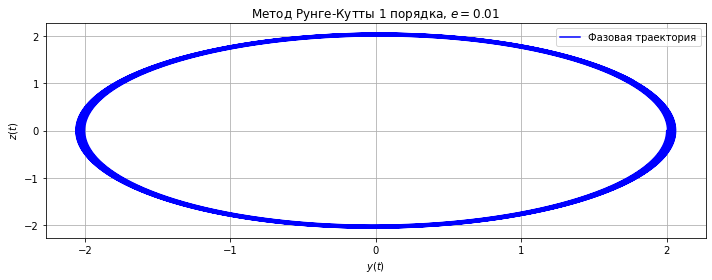

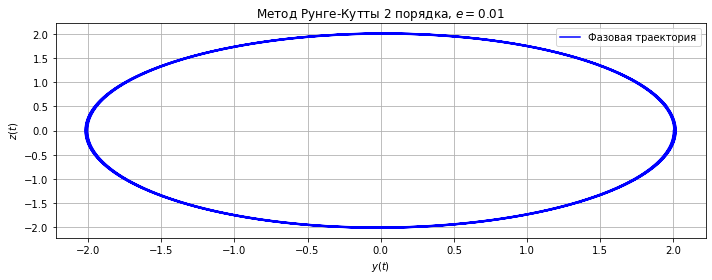

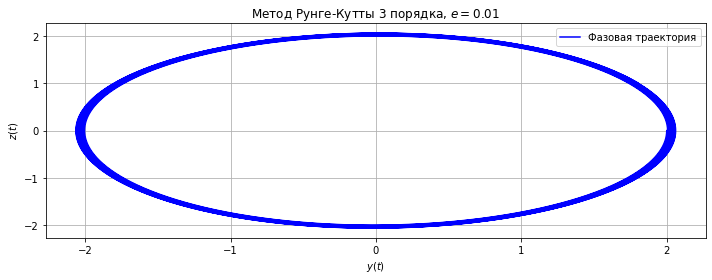

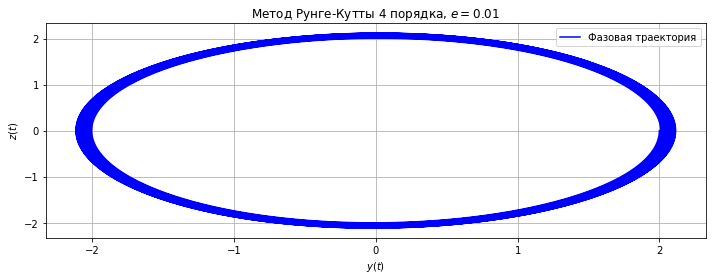

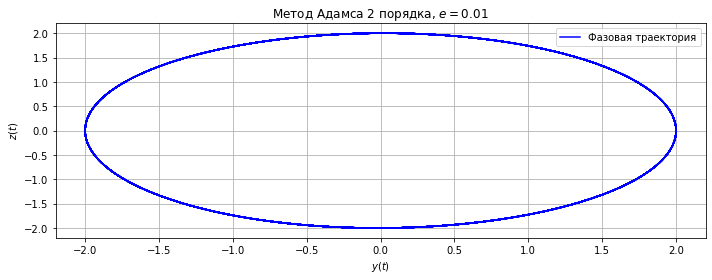

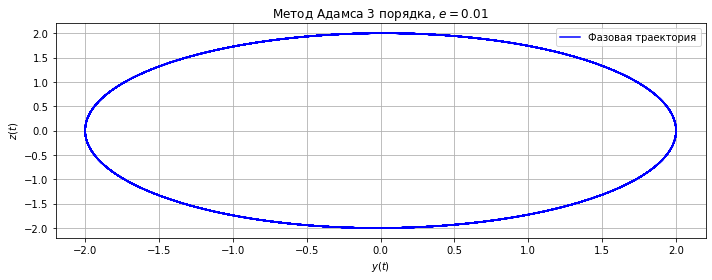

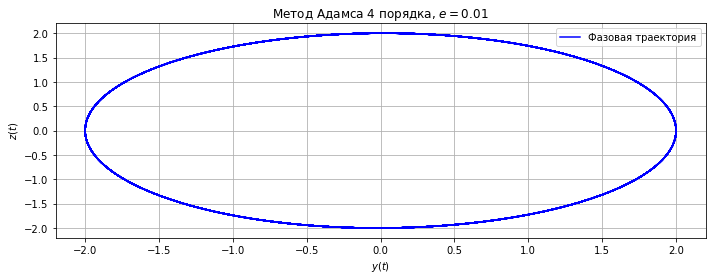

In [110]:
plotResults(0.01)

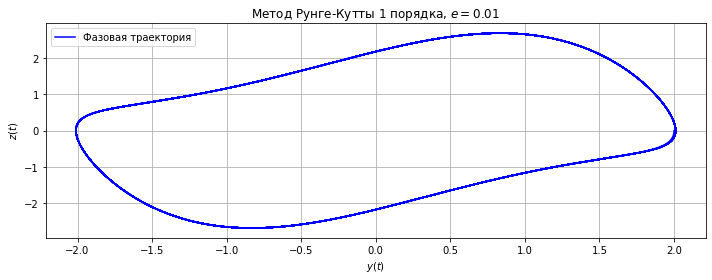

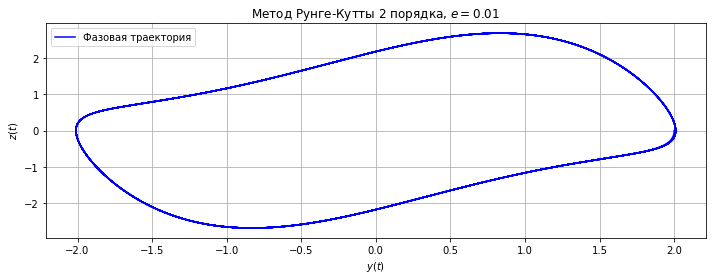

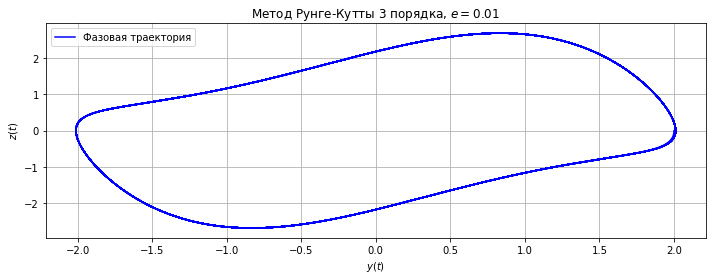

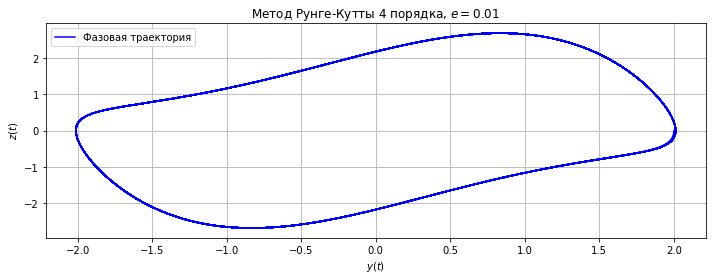

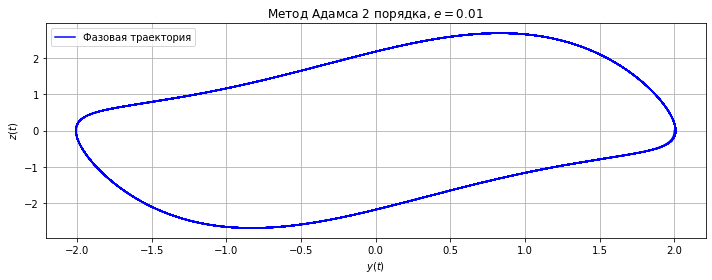

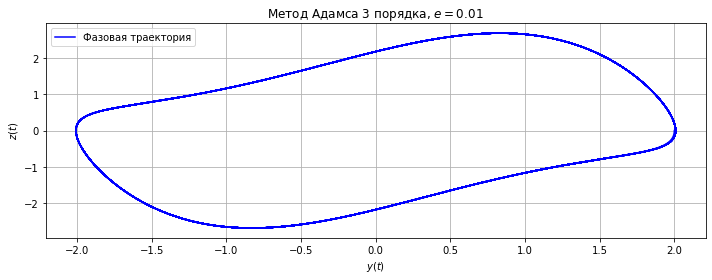

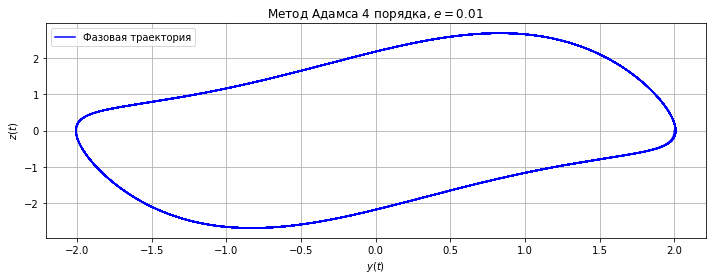

In [111]:
plotResults(1)

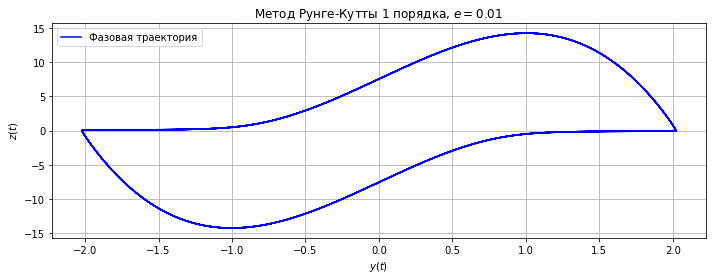

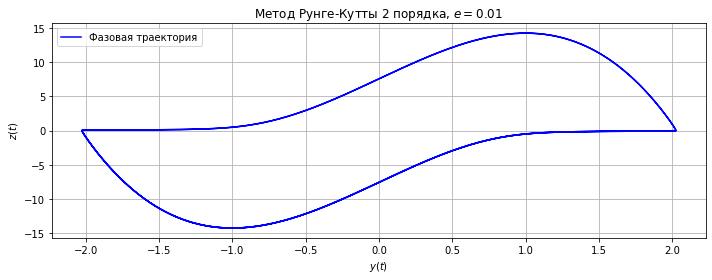

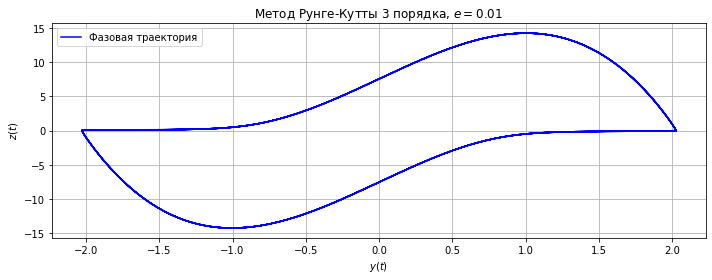

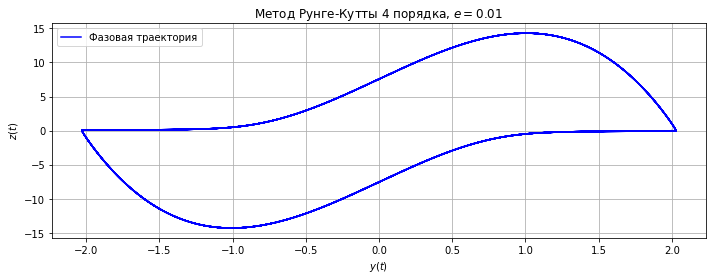

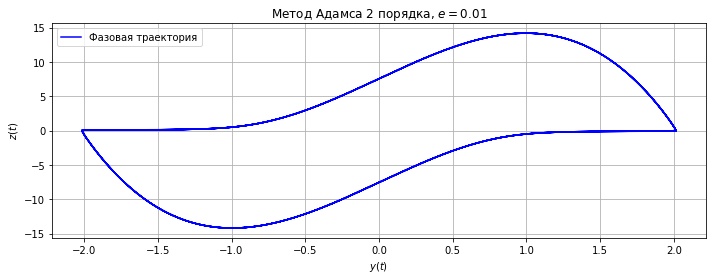

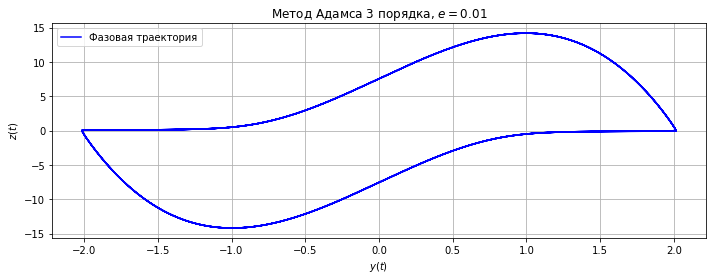

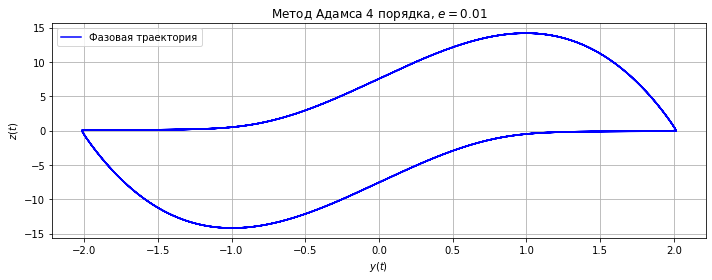

In [112]:
plotResults(10)

# Реализация

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def VanDerPolSysem(z, y, e, TYPE = 1):
    return z, e * (1 - y**2) * z - y

In [46]:
def InitialСonditions():
    return 2, 0

In [47]:
def plot(y, z, description = ""):
    plt.figure(figsize=[10, 4])
    plt.title(description)
    plt.plot(y, z, 'b', label='Фазовая траектория')
    plt.grid()
    plt.xlabel("$y(t)$")
    plt.ylabel("$z(t)$")
    plt.legend()
    plt.tight_layout()
    plt.show()

### Метод Рунге-Кутты 1 порядка

![rg1.jpg](rg1.jpg)

In [101]:
def RungeKutta1(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    
    for t in range(0, elemsSize - 1):
        z[t+1] = z[t] + h * VanDerPolSysem(z[t], y[t], e)[1]
        y[t+1] = y[t] + h * VanDerPolSysem(z[t], y[t], e)[0]
    return y, z

###  Метод Рунге-Кутты 2 порядка

![rg2.jpg](rg2.jpg)

In [73]:
def RungeKutta2(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    
    for t in range(0, elemsSize - 1):
        k1 = VanDerPolSysem(z[t], y[t], e)[0], VanDerPolSysem(z[t], y[t], e)[1]
        k2 = VanDerPolSysem(z[t] + 0.5 * h * k1[0], y[t] + 0.5 * h, e)[0], VanDerPolSysem(z[t] + 0.5 * h * k1[1], y[t] + 0.5 * h, e)[1]
    
        y[t+1] = y[t] + h * (k2[0] * 0.5)
        z[t+1] = z[t] + h * (k2[1] * 0.5)
    return y, z

###  Метод Рунге-Кутты 3 порядка

![rg3.jpg](rg3.jpg)

In [92]:
def RungeKutta3(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    
    for t in range(0, elemsSize - 1):
        k1 = VanDerPolSysem(z[t], y[t], e)[0], VanDerPolSysem(z[t], y[t], e)[1]
        k2 = VanDerPolSysem(z[t] +  h / 3. * k1[0], y[t] + h / 3.0, e)[0], VanDerPolSysem(z[t] +  h / 3. * k1[1], y[t] + h / 3.0, e)[1]
        k3 = VanDerPolSysem(z[t] + 2 * h / 3. * k2[0], y[t] + 2 * h / 3.0, e)[0], VanDerPolSysem(z[t] + 2 * h / 3. * k2[1], y[t] + 2 * h / 3.0, e)[1]
    
        y[t+1] = y[t] + h / 4 * k1[0] + h * 3 / 4 * k3[0]
        z[t+1] = z[t] + h / 4 * k1[1] + h * 3 / 4 * k3[1]
    return y, z

###  Метод Рунге-Кутты 4 порядка

![rg4.jpg](rg4.jpg)

In [84]:
def RungeKutta4(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    
    for t in range(0, elemsSize - 1):
        k1 = VanDerPolSysem(z[t], y[t], e)[0], VanDerPolSysem(z[t], y[t], e)[1]
        k2 = VanDerPolSysem(z[t] +  h / 2. * k1[0], y[t] + h / 2.0, e)[0], VanDerPolSysem(z[t] +  h / 2. * k1[1], y[t] + h / 2.0, e)[1]
        k3 = VanDerPolSysem(z[t] +  h / 2. * k2[0], y[t] + h / 2.0, e)[0], VanDerPolSysem(z[t] +  h / 2. * k2[1], y[t] + h / 2.0, e)[1]
        k4 = VanDerPolSysem(z[t] +  h * k3[0], y[t] + h, e)[0], VanDerPolSysem(z[t] +  h * k3[1], y[t] + h, e)[1]

        y[t+1] = y[t] + h * (4 * k1[0] / 6. + 2 * k2[0] / 6.0 + 2 / 6.0 * k3[0] + k4[0] / 6)
        z[t+1] = z[t] + h * (4 * k1[1] / 6. + 2 * k2[1] / 6.0 + 2 / 6.0 * k3[1] + k4[1] / 6)
    return y, z

### Метод Адамса 2 - 4 порядок

![adams.jpg](adams.jpg)

In [102]:
def Adams2(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    y[1] = RungeKutta2(h, e, rhs)[0][1]
    z[1] = RungeKutta2(h, e, rhs)[1][1]
    
    for t in range(1, elemsSize - 1):
        y[t+1] = y[t] + h * (1.5 * VanDerPolSysem(z[t], y[t], e)[0] - 0.5 * VanDerPolSysem(z[t-1], y[t-1], e)[0])
        z[t+1] = z[t] + h * (1.5 * VanDerPolSysem(z[t], y[t], e)[1] - 0.5 * VanDerPolSysem(z[t-1], y[t-1], e)[1])
        
    return y, z

In [98]:
def Adams3(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    y[1] = RungeKutta3(h, e, rhs)[0][1]
    z[1] = RungeKutta3(h, e, rhs)[1][1]
    y[2] = RungeKutta3(h, e, rhs)[0][2]
    z[2] = RungeKutta3(h, e, rhs)[1][2]
    
    for t in range(2, elemsSize - 1):
        y[t+1] = y[t] + h * (23.0 / 12 * VanDerPolSysem(z[t], y[t], e)[0] - 16.0 / 12 * VanDerPolSysem(z[t-1], y[t-1], e)[0] + 5.0 / 12 * VanDerPolSysem(z[t-2], y[t-2], e)[0])
        z[t+1] = z[t] + h * (23.0 / 12 * VanDerPolSysem(z[t], y[t], e)[1] - 16.0 / 12 * VanDerPolSysem(z[t-1], y[t-1], e)[1] + 5.0 / 12 * VanDerPolSysem(z[t-2], y[t-2], e)[1])
        
    return y, z

In [97]:
def Adams4(h, e, rhs):
    elemsSize = int(rhs/h)
    y = np.zeros(elemsSize)
    z = np.zeros(elemsSize)
    
    y[0] = InitialСonditions()[0]
    z[0] = InitialСonditions()[1]
    y[1] = RungeKutta4(h, e, rhs)[0][1]
    z[1] = RungeKutta4(h, e, rhs)[1][1]
    y[2] = RungeKutta4(h, e, rhs)[0][2]
    z[2] = RungeKutta4(h, e, rhs)[1][2]
    y[3] = RungeKutta4(h, e, rhs)[0][3]
    z[3] = RungeKutta4(h, e, rhs)[1][3]
    
    for t in range(3, elemsSize - 1):
        y[t+1] = y[t] + h * (55.0 / 24 * VanDerPolSysem(z[t], y[t], e)[0] - 59.0 / 24 * VanDerPolSysem(z[t-1], y[t-1], e)[0] + 37.0 / 24.0 * VanDerPolSysem(z[t-2], y[t-2], e)[0] - 9.0 / 24 * VanDerPolSysem(z[t-3], y[t-3], e)[0])
        z[t+1] = z[t] + h * (55.0 / 24 * VanDerPolSysem(z[t], y[t], e)[1] - 59.0 / 24 * VanDerPolSysem(z[t-1], y[t-1], e)[1] + 37.0 / 24.0 * VanDerPolSysem(z[t-2], y[t-2], e)[1] - 9.0 / 24 * VanDerPolSysem(z[t-3], y[t-3], e)[1])
    return y, z

In [106]:
def plotResults(e):
    y, z = RungeKutta1(0.001, e, 100)
    plot(y, z, "Метод Рунге-Кутты 1 порядка, $e = 0.01$")
    
    y, z = RungeKutta2(0.001, e, 100)
    plot(y, z, "Метод Рунге-Кутты 2 порядка, $e = 0.01$")
    
    y, z = RungeKutta3(0.001, e, 100)
    plot(y, z, "Метод Рунге-Кутты 3 порядка, $e = 0.01$")
    
    y, z = RungeKutta4(0.001, e, 100)
    plot(y, z, "Метод Рунге-Кутты 4 порядка, $e = 0.01$")
    
    y, z = Adams2(0.001, e, 100)
    plot(y, z, "Метод Адамса 2 порядка, $e = 0.01$")
    
    y, z = Adams3(0.001, e, 100)
    plot(y, z, "Метод Адамса 3 порядка, $e = 0.01$")
    
    y, z = Adams3(0.001, e, 100)
    plot(y, z, "Метод Адамса 4 порядка, $e = 0.01$")